# KE5105 - Building Electrical Consumption Forecasting

# Extract, Transform and Load Data 10 - Data Transformation

## Transform all building data

## Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import myUtilities as mu
import pickle
import os
import numpy as np

## Load building lists

In [2]:
to_load_file = open(os.path.join('source', 'other_data', 'group1_bldg_list.pickle'), 'rb')
group1_bldgs = pickle.load(to_load_file)
group1_bldgs.sort()
group1_bldgs

['AS4', 'AS5', 'CELS', 'E4', 'EA', 'MRB', 'S1A', 'SDE-1', 'SDE-2', 'SDE-3']

In [3]:
to_load_file = open(os.path.join('source', 'other_data', 'group2_bldg_list.pickle'), 'rb')
group2_bldgs = pickle.load(to_load_file)
group2_bldgs.sort()
group2_bldgs

['AS1',
 'AS2',
 'AS3',
 'AS6',
 'AS7',
 'AS8',
 'Alumni House',
 'BIZ 2',
 'Block B',
 'Brenner Center of Molecular Medicine',
 'CAPT',
 'CELC',
 'CJK Law Library',
 'COM1',
 'COM2',
 'Central Library',
 'Central Library Annex',
 'Cinnamon',
 'Computer Center',
 'Create',
 'Dentistry',
 'E1',
 'E1A',
 'E2',
 'E3',
 'E3A',
 'E4A',
 'E5',
 'EDIC',
 'ERC',
 'ETS Building',
 'EW1',
 'EW2',
 'Eusoff Hall',
 'Federal Building',
 'Graduate Residence',
 'HSE15',
 'HSSML',
 'I-Cube',
 'ISS',
 'KE 7 Hall',
 'KR Hall',
 'Kuok Foundation House',
 'LKCNHM',
 'Li Ka Shing Building',
 'MD1',
 'MD10',
 'MD11',
 'MD2',
 'MD3',
 'MD4andMD4a',
 'MD6',
 'MD7',
 'MD9',
 'MM Building',
 'NUS Centre of Arts',
 'NUS Museum',
 'OCS',
 'OTH',
 'PGPR',
 'RC4',
 'Raffles Hall',
 'Ridge View',
 'Ridge View Residence',
 'S1',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S2',
 'S2S',
 'S3',
 'S4',
 'S4A',
 'S5',
 'S6',
 'S7',
 'S8',
 'SRC',
 'SSLS',
 'Sheares Hall',
 'Sports and Recreation Cent

## Transform the data

In [4]:
# Transform the csv file for each group 1 & 2 building performing differencing, aggregation and outlier removal.
mu.process_data_by_bldg(group1_bldgs + group2_bldgs)

True

## Plot the Transformed Data

In [4]:
def plot_pwm_upto10_bldgs(bldg_df_list):

    nrows = int(np.ceil(len(bldg_df_list)/2))
    height = nrows * 4
    no_more_plots = False

    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, height))
    for row_idx, row in enumerate(ax):
        for col_idx, col in enumerate(row):
            if not no_more_plots:
                # Index of the (building name and dataframe) list
                bldg_idx = row_idx * len(row) + col_idx

                # Plot the time series data.
                col.plot(bldg_df_list[bldg_idx][1].loc[:, ['PWM_30min_avg', 'BTU_30min_avg']], alpha=.5)
                col.set_title(bldg_df_list[bldg_idx][0]+' PWM over 2015-2018')
                col.legend(bldg_df_list[bldg_idx][1].loc[:, ['PWM_30min_avg', 'BTU_30min_avg']])

                if bldg_idx >= len(bldg_df_list) - 1:
                    no_more_plots = True
            else:
                col.axis('off')
    plt.show()
    return None

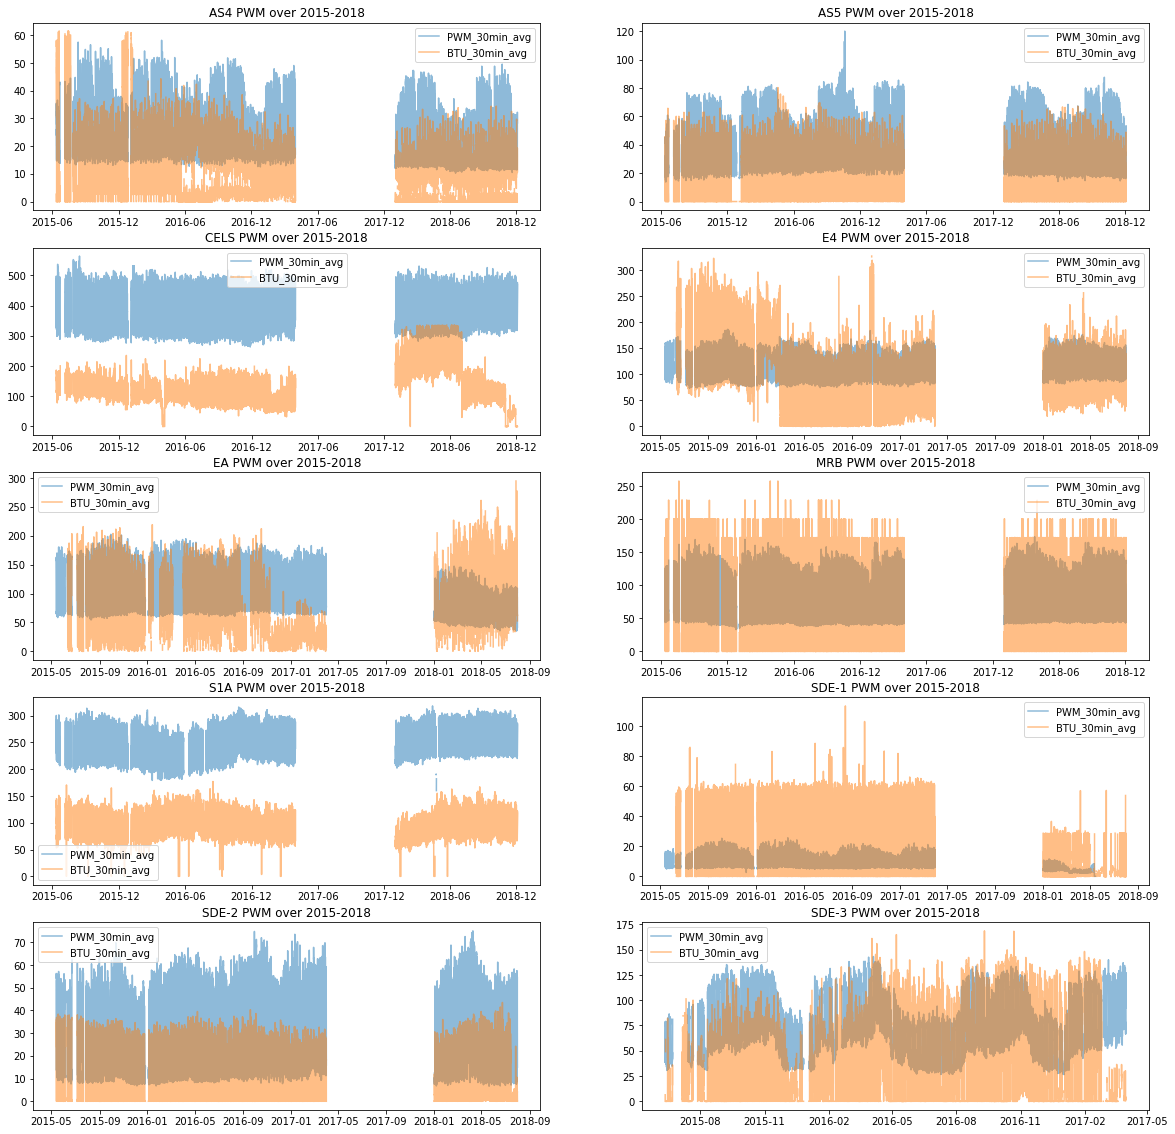

In [5]:
bldg_df_list = mu.load_data_by_bldg(bldg_name_list=group1_bldgs, data_type='processed')
plot_pwm_upto10_bldgs(bldg_df_list)

Compare the above plot with the same plot in (etl9.explore_btu.ipynb) before outlier removal to see the amount of data removed (outliers and negative values).